In [1]:
import pandas as pd
import numpy as np
import tushare as ts
import os

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

%matplotlib inline

In [2]:
from DataRead import Read

In [3]:
token='2a1fb46d14d3e715f95e4b25cf9cc02bd4d768a4f09b6ec45f389179'
pro=ts.pro_api(token)

In [4]:
s_date='2022-1-1'
e_date='2023-1-25'

In [28]:
read=Read()
df_coin=read.read_kline(freq_type='1d',market='BTCUSDT')
df_coin['ts']=pd.to_datetime(df_coin.index).strftime('%Y-%m-%d')
df_coin=df_coin.set_index('ts')
df_coin.index=pd.to_datetime(df_coin.index)
df_coin=df_coin.loc[s_date:e_date,['close']].copy()
df_coin.rename(columns={'close':'BTC'},inplace=True)
# # 数据Z-score标准化处理
# df_coin = (df_coin-df_coin.mean())/df_coin.std()

In [45]:
df_ixic=pro.index_global(ts_code='IXIC',start_date=s_date,end_date=e_date)

df_nasdaq=df_ixic.copy()
df_nasdaq['ts']=pd.to_datetime(df_nasdaq['trade_date'])
df_nasdaq=df_nasdaq.set_index('ts')
df_nasdaq=df_nasdaq.sort_index(ascending=True)
df_nasdaq=df_nasdaq[['close']].copy()
df_nasdaq.rename(columns={'close':'NASDAQ'},inplace=True)

In [29]:
df_spx=pro.index_global(ts_code='SPX')

df_spx=df_spx.copy()
df_spx['ts']=pd.to_datetime(df_spx['trade_date'])
df_spx=df_spx.set_index('ts')
df_spx=df_spx.sort_index(ascending=True)
df_spx=df_spx[['close']].copy()
df_spx.rename(columns={'close':'SPX'},inplace=True)
# # 数据Z-score标准化处理
# df_spx = (df_spx - df_spx.mean())/df_spx.std()

In [46]:
df=pd.merge(df_coin,df_nasdaq,left_index=True,right_index=True,how='left')

df=df.dropna()

df=(df-df.mean())/df.std()

In [47]:
corr=df['BTC'].rolling(window=60).corr(df['NASDAQ'])

<AxesSubplot:xlabel='ts'>

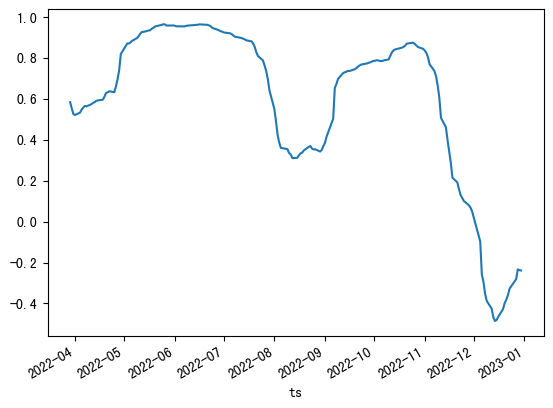

In [48]:
corr.plot()

<AxesSubplot:xlabel='ts'>

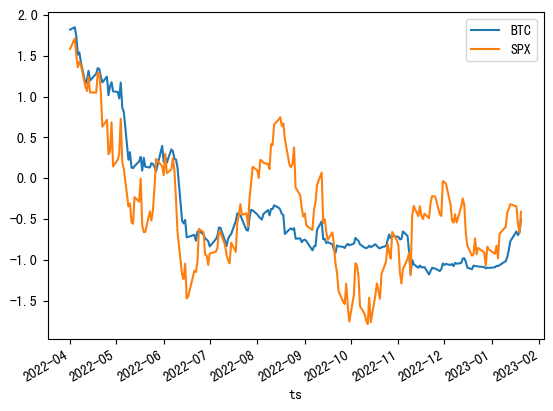

In [36]:
df.loc['2022-4':].plot()

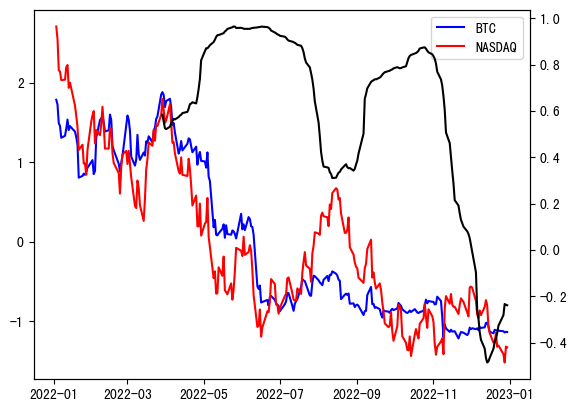

In [49]:
ax1=plt.subplot(111)
ax1.plot(df.index, df['BTC'], color='b', label='BTC')
ax1.plot(df.index, df['NASDAQ'], color='r', label='NASDAQ')

ax2=ax1.twinx()
ax2.plot(corr.index, corr, color='k')

ax1.legend()
plt.show()

In [44]:
df.describe()

,BTC,SPX
count,2.630000e+02,2.630000e+02
mean,1.286255e-15,-5.481462e-15
std,1.000000e+00,1.000000e+00
min,-1.178040e+00,-1.783623e+00
25%,-8.208417e-01,-7.965062e-01
50%,-5.016507e-01,-2.861922e-01
75%,1.076173e+00,7.482293e-01
max,1.931217e+00,2.453607e+00
